In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:

warnings.filterwarnings('ignore')

In [3]:
customers = pd.read_csv('Project/Customers.csv')
transactions = pd.read_csv('Project/Transactions.csv')

print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
customer_transactions = pd.merge(customers, transactions, on='CustomerID', how='inner')

In [5]:
customer_summary = customer_transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [6]:
customer_data = pd.merge(customers, customer_summary, on='CustomerID', how='inner')


In [7]:
customer_data_for_clustering = customer_data.drop(columns=['CustomerID', 'CustomerName', 'Region', 'SignupDate'])

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_for_clustering)

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # You can change n_clusters from 2 to 10
kmeans.fit(scaled_features)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [10]:
customer_data['Cluster'] = kmeans.labels_


In [11]:
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.9088862131710538


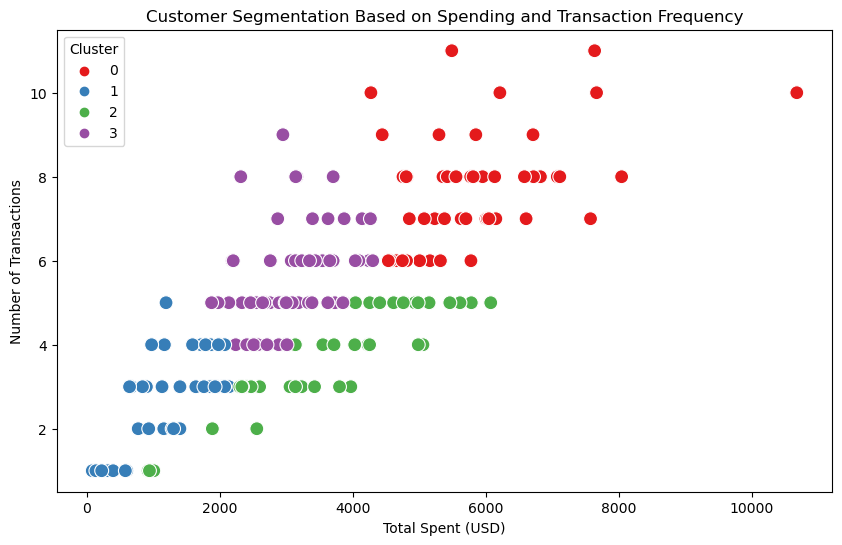

In [12]:
# Visualize the first two features with a scatter plot and color by cluster label
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['total_spent'], y=customer_data['num_transactions'], hue=customer_data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation Based on Spending and Transaction Frequency')
plt.xlabel('Total Spent (USD)')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.show()

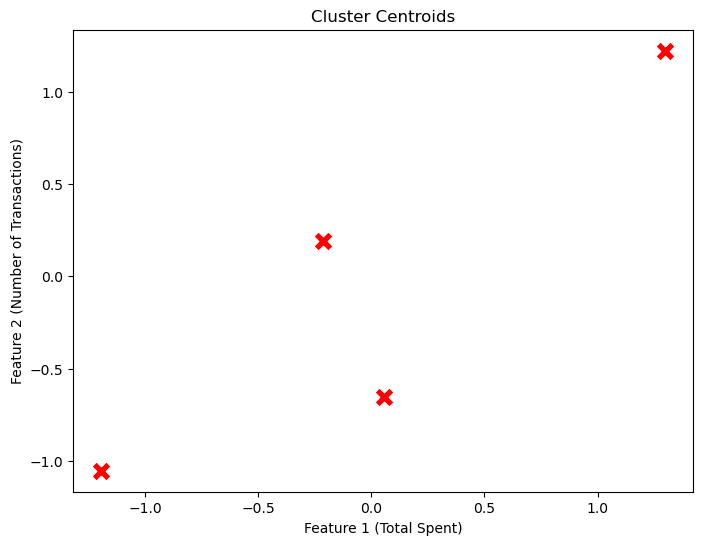

In [13]:
# Plot the cluster centroids (using first two principal components for visualization)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', s=200, color='red')
plt.title('Cluster Centroids')
plt.xlabel('Feature 1 (Total Spent)')
plt.ylabel('Feature 2 (Number of Transactions)')
plt.show()

In [14]:
print(customer_data.head())  # Display first few rows of clustered data


  CustomerID        CustomerName         Region  SignupDate  total_spent  \
0      C0001    Lawrence Carroll  South America  2022-07-10      3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13      1862.74   
2      C0003      Michael Rivera  South America  2024-03-07      2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09      5354.88   
4      C0005         Laura Weber           Asia  2022-08-15      2034.24   

   num_transactions  avg_transaction_value  Cluster  
0                 5                670.904        3  
1                 4                465.685        1  
2                 4                681.345        3  
3                 8                669.360        0  
4                 3                678.080        1  


In [15]:
customer_data.to_csv('Customer_Segmentation_Clusters.csv', index=False)

In [16]:
report = f"Number of clusters: {kmeans.n_clusters}\nDavies-Bouldin Index: {db_index}"
print(report)

Number of clusters: 4
Davies-Bouldin Index: 0.9088862131710538
